# Delphes Simulation Example

some example code to show how to handle the output from the Delphes simulation

The orignal root data files are here: 
- https://cernbox.cern.ch/index.php/s/DkyggyfivWUHZRz

Pileup is simulated with average nPU=50

In [1]:
import uproot
import awkward as ak
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

open the root file and read the related branches

In [2]:
features = [
    'PF/PF.PT', 'PF/PF.Eta', 'PF/PF.Phi', 'PF/PF.Mass', 
    'PF/PF.Charge', 'PF/PF.PdgID', 'PF/PF.IsRecoPU', 
    'PF/PF.IsPU'
]
# read the ttree
tree = uproot.open("test_gg.root")["Delphes"]
pfcands = tree.arrays(features, entry_start=0, entry_stop=1000)

Define the |eta|<2.5 selection

In [3]:
isCentral = (abs(pfcands['PF/PF.Eta'])<2.5)

Three types of particles: charged, photons, and neutral hadrons

In [4]:
isChg = isCentral & (abs(pfcands['PF/PF.Charge'])!=0)
isChgLV = isChg & (pfcands['PF/PF.IsPU']==0)
isChgPU = isChg & (pfcands['PF/PF.IsPU']==1)

isPho = isCentral & (abs(pfcands['PF/PF.PdgID'])==22)
isPhoLV = isPho & (pfcands['PF/PF.IsPU']==0)
isPhoPU = isPho & (pfcands['PF/PF.IsPU']==1)

isNeuH = isCentral & (abs(pfcands['PF/PF.PdgID'])==0)

Plot one event

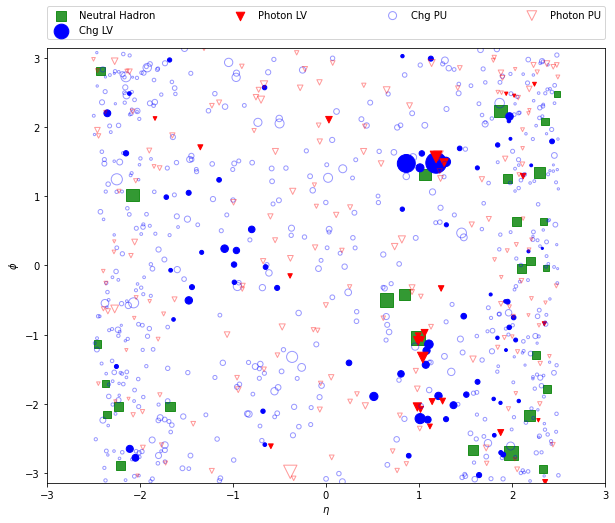

In [5]:
ievt = 70

# plot all PF Candidates
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(pfcands['PF/PF.Eta'][isNeuH][ievt],  pfcands['PF/PF.Phi'][isNeuH][ievt],  s=pfcands['PF/PF.PT'][isNeuH][ievt]*20.0, color='green', marker='s', alpha=0.8,label='Neutral Hadron')
ax.scatter(pfcands['PF/PF.Eta'][isChgLV][ievt],  pfcands['PF/PF.Phi'][isChgLV][ievt],  s=pfcands['PF/PF.PT'][isChgLV][ievt]*20.0,   c='blue',  marker='o', label='Chg LV')
ax.scatter(pfcands['PF/PF.Eta'][isPhoLV][ievt],  pfcands['PF/PF.Phi'][isPhoLV][ievt],  s=pfcands['PF/PF.PT'][isPhoLV][ievt]*20.0,   c='red',   marker='v', label='Photon LV')
ax.scatter(pfcands['PF/PF.Eta'][isChgPU][ievt],  pfcands['PF/PF.Phi'][isChgPU][ievt],  s=pfcands['PF/PF.PT'][isChgPU][ievt]*20.0,   
           marker='o', facecolor="None", edgecolor='blue', alpha=0.4, label='Chg PU')
ax.scatter(pfcands['PF/PF.Eta'][isPhoPU][ievt],  pfcands['PF/PF.Phi'][isPhoPU][ievt],  s=pfcands['PF/PF.PT'][isPhoPU][ievt]*20.0,   marker='v', facecolor="None",
         edgecolor='red', alpha=0.4,label='Photon PU')

ax.set_ylabel(r'$\phi$')
#plt.xticks(np.arange(-np.pi, np.pi))
ax.set_ylim(-np.pi, np.pi)
ax.set_xlabel(r'$\eta$')
ax.set_xlim(-3.0, 3.0)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)
#plt.yticks(np.arange(-3.0, 3.0))
plt.show()